<a href="https://colab.research.google.com/github/emuanel/Voice-Pathology-Detection/blob/main/MFCC_Mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import glob 
import numpy as np
from keras.layers import Dense, Input, Flatten, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from statistics import mean, median

DATA: Saarbruecken Voice Database

http://stimmdb.coli.uni-saarland.de/

In [ ]:
pathological_dir = "/content/drive/MyDrive/projektySem2Mgr/IUI/data/pathological/"
pathological_paths = glob.glob(pathological_dir+"*.wav")

healthy_dir = "/content/drive/MyDrive/projektySem2Mgr/IUI/data/healthy/"
healthy_paths = glob.glob(healthy_dir+"*.wav")

X = []
y = []

for pathological in pathological_paths:
    X.append(librosa.load(pathological))
    y.append(1)
    
for healthy in healthy_paths:
    X.append(librosa.load(healthy))
    y.append(0)

In [ ]:
def MFCC(y, sr, n_mfcc=13):
    return np.mean(librosa.feature.mfcc(y=y, n_mfcc=n_mfcc, sr=sr), axis=1)

MFCC_data = []

for signal in X:
    MFCC_data.append(MFCC(signal[0], signal[1]))

X_MFCC = np.array(MFCC_data)

In [ ]:
#input_shape = (X_MFCC.shape[1], X_MFCC.shape[2], 1)

model = Sequential([               
    Dense(124, activation='relu'), 
    Dense(16, activation='relu'),
    Dense(4, activation='relu'),  
    
    Dense(1, activation='sigmoid') 
    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

X_train, X_test, y_train, y_test = train_test_split(X_MFCC, np.array(y), test_size=0.3, random_state=42)
x_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

batch_size=16
epochs=10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid))

print(model.summary())

Epoch 1/10
67/67 [==============================] - 1s 5ms/step - loss: 1.4508 - accuracy: 0.5751 - val_loss: 1.1024 - val_accuracy: 0.5903
Epoch 2/10
67/67 [==============================] - 0s 3ms/step - loss: 0.7812 - accuracy: 0.6138 - val_loss: 1.0674 - val_accuracy: 0.6035
Epoch 3/10
67/67 [==============================] - 0s 3ms/step - loss: 0.7452 - accuracy: 0.6280 - val_loss: 0.8372 - val_accuracy: 0.5595
Epoch 4/10
67/67 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.6242 - val_loss: 0.6650 - val_accuracy: 0.5815
Epoch 5/10
67/67 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.6525 - val_loss: 0.8453 - val_accuracy: 0.5991
Epoch 6/10
67/67 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.6553 - val_loss: 0.9699 - val_accuracy: 0.6035
Epoch 7/10
67/67 [==============================] - 0s 3ms/step - loss: 0.7717 - accuracy: 0.5987 - val_loss: 0.9798 - val_accuracy: 0.6035
Epoch 8/10
67/67 [==

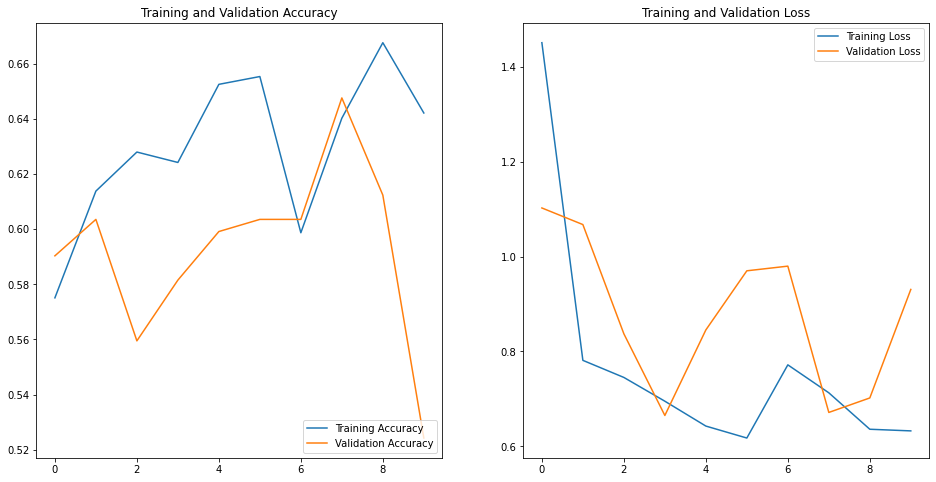

              precision    recall  f1-score   support

           0       0.52      0.95      0.67       103
           1       0.87      0.27      0.41       124

    accuracy                           0.58       227
   macro avg       0.69      0.61      0.54       227
weighted avg       0.71      0.58      0.53       227



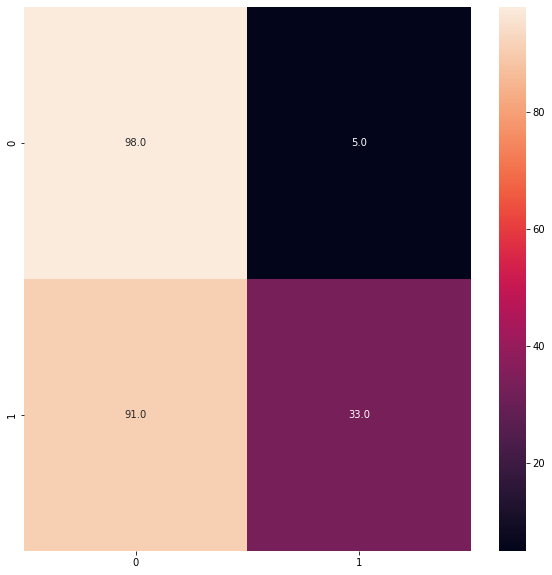

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

y_pred = model.predict(X_test)
y_pred = np.where(y_pred < 0.5, 0, 1)
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)

plt.subplots(figsize=(10,10))  
sn.heatmap(matrix, annot = True, annot_kws={"size": 10}, fmt = '.1f')